# Multivariate Time Series Weather Forecasting  

### Import Dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Collection and Processing

In [4]:
# load dataset
climate_data = pd.read_csv("/content/drive/MyDrive/SEM-6/NAAN MUDHALVAN/climate_2009_2016.csv")

In [5]:
# show dataset
climate_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [6]:
# dataset dimension
climate_data.shape

(420551, 15)

In [7]:
# Takuing each hour data only
climate_data = climate_data[5::6]
climate_data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [8]:
# change the index columns to plot with datetime
climate_data.index = pd.to_datetime(climate_data['Date Time'], format='%d.%m.%Y %H:%M:%S')
# display data for 24hrs
climate_data[:24]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


### Data Visualization

In [9]:
# feature visualization function
def plot_feature(feature, feature_name):
    plt.plot(feature)
    plt.xlabel("Years")
    plt.ylabel(feature_name)
    plt.title(f"Time Series {feature_name} Plot")

In [10]:
# features
temperature = climate_data['T (degC)']
pressure = climate_data["p (mbar)"]

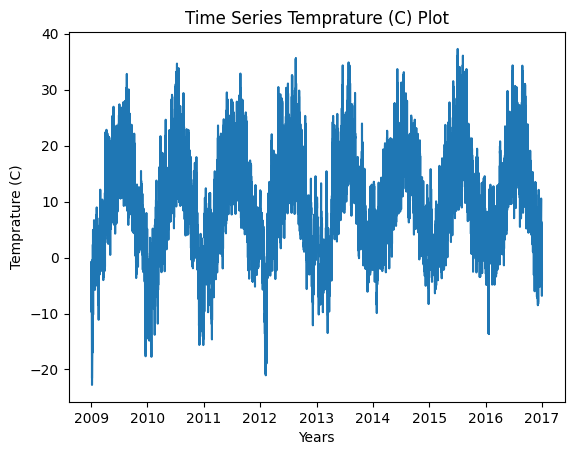

In [11]:
plot_feature(temperature, "Temprature (C)")

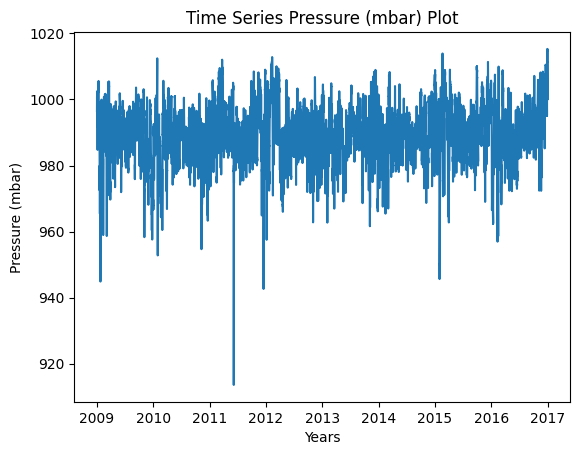

In [12]:
plot_feature(pressure, "Pressure (mbar)")

### Make new dataframe with multiple features

In [13]:
# create new dataframe with the feature columns
temp_pre_time_df = pd.DataFrame({"Pressure": pressure,
                            "Temperature": temperature,
                            "Seconds": climate_data.index.map(pd.Timestamp.timestamp)
                           })
temp_pre_time_df

,Pressure,Temperature,Seconds
Date Time,,,
2009-01-01 01:00:00,996.50,-8.05,1.230772e+09
2009-01-01 02:00:00,996.62,-8.88,1.230775e+09
2009-01-01 03:00:00,996.84,-8.81,1.230779e+09
2009-01-01 04:00:00,996.99,-9.05,1.230782e+09
2009-01-01 05:00:00,997.46,-9.63,1.230786e+09
...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,1.483211e+09
2016-12-31 20:10:00,1001.40,-1.40,1.483215e+09
2016-12-31 21:10:00,1001.19,-2.75,1.483219e+09


In [14]:
# seconds in a year
day = 60*60*24
year = 365.2425*day

# time into sin and cos signals
temp_pre_time_df['Day sin']  = np.sin(temp_pre_time_df['Seconds'] * (2 * np.pi / day))
temp_pre_time_df['Day cos']  = np.cos(temp_pre_time_df['Seconds'] * (2 * np.pi / day))
temp_pre_time_df['Year sin']  = np.sin(temp_pre_time_df['Seconds'] * (2 * np.pi / year))
temp_pre_time_df['Year cos']  = np.cos(temp_pre_time_df['Seconds'] * (2 * np.pi / year))
temp_pre_time_df.head()

,Pressure,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [15]:
# remove seconds column
temp_pre_time_df = temp_pre_time_df.drop('Seconds', axis=1)
temp_pre_time_df.head()

,Pressure,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


### Selecting Features and targets

In [16]:
# preparing features(each row in dataframe) and target(pressure and temperature)
def df_to_X_Y(df, window_size = 7):
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][:2]
        Y.append(label)
    return np.array(X), np.array(Y)

In [17]:
# features(70084 data each window contains 7rows, 6 columns) and target(70084 data each 2 columns) dimensions
X, Y = df_to_X_Y(temp_pre_time_df)
X.shape, Y.shape

((70084, 7, 6), (70084, 2))

### Split Train Test data

In [18]:
# train test
X_train, Y_train = X[:60000], Y[:60000]
X_val, Y_val = X[60000:65000], Y[60000:65000]
X_test, Y_test = X[65000:], Y[65000:]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

### Data Standardization

In [19]:
# calculate mean, std and standardise data
p_training_mean = np.mean(X_train[:, :, 0])
p_training_std = np.std(X_train[:, :, 0])

temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - p_training_mean) / p_training_std
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean) / temp_training_std
    return X

def preprocess_output(Y):
    Y[:, 0] = (Y[:, 0] - p_training_mean) / p_training_std
    Y[:, 1] = (Y[:, 1] - temp_training_mean) / temp_training_std
    return Y

In [20]:
# preprocess inputs
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

# preprocess outputs
preprocess_output(Y_train)
preprocess_output(Y_val)
preprocess_output(Y_test)

array([[  -0.7934386 , -118.35804908],
       [  -0.76312281, -118.41868065],
       [  -0.72189335, -118.45020907],
       ...,
       [   1.48145784, -120.25945506],
       [   1.41597574, -120.2764319 ],
       [   1.35049365, -120.40254556]])

### Model Building

### LSTM Neural Network

In [21]:
## LSTM Model
model_lstm = Sequential()
model_lstm.add(InputLayer((7, 6)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(8, 'relu'))
model_lstm.add(Dense(2, 'linear'))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18176     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#save best model
cp_lstm = ModelCheckpoint('model_lstm/', save_best_only = True)

#complile model
model_lstm.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [23]:
# model training
model_lstm.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 10, callbacks = [cp_lstm])

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 5963.9814 - root_mean_squared_error: 77.2268 - val_loss: 4674.5620 - val_root_mean_squared_error: 68.3708
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 3307.4995 - root_mean_squared_error: 57.5109 - val_loss: 2067.9265 - val_root_mean_squared_error: 45.4745
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1115.9877 - root_mean_squared_error: 33.4064 - val_loss: 421.3662 - val_root_mean_squared_error: 20.5272
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 136.6330 - root_mean_squared_error: 11.6890 - val_loss: 12.3610 - val_root_mean_squared_error: 3.5158
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.4960 - root_mean_squared_error: 1.5799 - val_loss: 1.0349 - val_root_mean_squared_error: 1.0173
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0327 - root_mean_square

### Convolutional Neural Network

In [24]:
## CNN Model
model_CNN = Sequential()
model_CNN.add(InputLayer((7, 6)))
model_CNN.add(Conv1D(64, kernel_size=2, activation="relu"))
model_CNN.add(Flatten())
model_CNN.add(Dense(8, 'relu'))
model_CNN.add(Dense(2, 'linear'))
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             832       
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 3080      
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# CNN Checkpoints
cp_CNN = ModelCheckpoint('model_CNN/', save_best_only = True)

# CNN compile
model_CNN.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [26]:
# CNN training
model_CNN.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 10, callbacks = [cp_CNN])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 992.7941 - root_mean_squared_error: 31.5086 - val_loss: 0.5662 - val_root_mean_squared_error: 0.7525
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2451 - root_mean_squared_error: 0.4951 - val_loss: 0.1404 - val_root_mean_squared_error: 0.3748
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0702 - root_mean_squared_error: 0.2649 - val_loss: 0.0494 - val_root_mean_squared_error: 0.2223
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0531 - root_mean_squared_error: 0.2303 - val_loss: 0.0498 - val_root_mean_squared_error: 0.2231
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0533 - root_mean_squared_error: 0.2308 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2167
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0539 - root_mean_squared_error: 0.2322 - val_loss

### GRU Neural Network

In [27]:
# GRU Model
model_GRU = Sequential()
model_GRU.add(InputLayer((7, 6)))
model_GRU.add(GRU(64))
model_GRU.add(Dense(8, 'relu'))
model_GRU.add(Dense(2, 'linear'))
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                13824     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 14362 (56.10 KB)
Trainable params: 14362 (56.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# GRU Checkpoints
cp_GRU = ModelCheckpoint('model_GRU/', save_best_only = True)

# GRU compile
model_GRU.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [29]:
# GRU training
model_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 10, callbacks = [cp_GRU])

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 7056.2627 - root_mean_squared_error: 84.0016 - val_loss: 7075.1431 - val_root_mean_squared_error: 84.1139
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 7022.4761 - root_mean_squared_error: 83.8002 - val_loss: 7052.8770 - val_root_mean_squared_error: 83.9814
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 7000.2876 - root_mean_squared_error: 83.6677 - val_loss: 7030.6450 - val_root_mean_squared_error: 83.8489
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 6978.1396 - root_mean_squared_error: 83.5353 - val_loss: 7008.4497 - val_root_mean_squared_error: 83.7165
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 6956.0254 - root_mean_squared_error: 83.4028 - val_loss: 6986.2881 - val_root_mean_squared_error: 83.5840
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 6933.9458 - r

### General Functions for Model Evaluation and Visualization

In [30]:
# reverse standardization to get orignal form
def post_process(arr):
    arr = (arr * p_training_std) + p_training_mean
    return arr

In [31]:
# prediction and plot for temperature
def plot_temp_predictions(model, X, Y, start=0, end=100):
    predictions = model.predict(X)
    temp_preds = post_process(predictions[:, 1])
    temp_actuals = post_process(Y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions':temp_preds,
                            'Temperature Actuals':temp_actuals,
                           })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.legend(["Predictions", "Actuals"])
    plt.ylabel("Temperature (deg C)")
    plt.title("Temperature Predictions")
    return df[start:end]

# prediction and plot for pressure
def plot_pre_predictions(model, X, Y, start=0, end=100):
    predictions = model.predict(X)
    p_preds = post_process(predictions[:, 0])
    p_actuals = post_process(Y[:, 0])
    df = pd.DataFrame(data={'Pressure Predictions':p_preds,
                            'Pressure Actuals':p_actuals
                           })
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    plt.legend(["Predictions", "Actuals"])
    plt.ylabel("Pressure (mbar)")
    plt.title("Pressure Predictions")
    return df[start:end]

#### Note: run the corresponding model training again before model evaluation for each one, otherwise mismatch predictions may occur.

### LSTM Model Evaluation

159/159 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals
0,13.735901,12.93
1,13.494446,12.43
2,13.486694,12.17
3,13.735840,11.55
4,14.173767,11.59
...,...,...
95,14.629456,15.52
96,14.178101,15.27
97,13.962158,15.07
98,13.992676,14.88


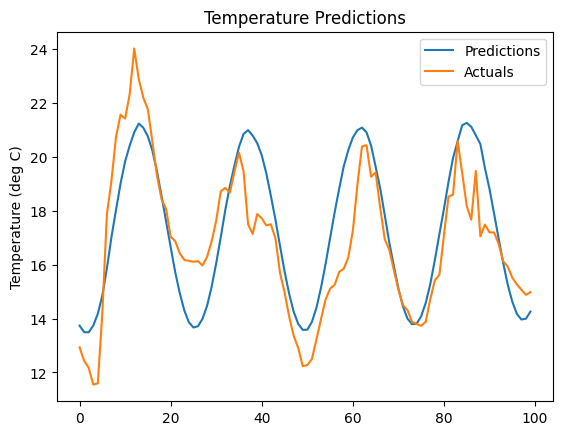

In [32]:
# evaluate and plot temperature
plot_temp_predictions(model_lstm, X_test, Y_test)

159/159 [==============================] - 0s 2ms/step


,Pressure Predictions,Pressure Actuals
0,985.710083,982.43
1,985.773071,982.68
2,985.882324,983.02
3,986.028503,983.59
4,986.257690,983.59
...,...,...
95,987.311584,985.54
96,987.331909,985.68
97,987.385437,985.68
98,987.415100,985.67


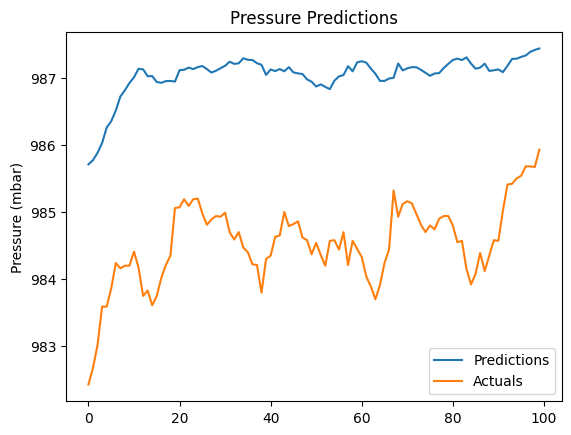

In [33]:
# evaluate and plot pressure
plot_pre_predictions(model_lstm, X_test, Y_test)

### CNN Model Evaluation

159/159 [==============================] - 0s 981us/step


,Temperature Predictions,Temperature Actuals
0,12.126160,12.93
1,11.776978,12.43
2,11.649841,12.17
3,11.670227,11.55
4,11.895996,11.59
...,...,...
95,12.697754,15.52
96,12.705444,15.27
97,12.863586,15.07
98,13.124390,14.88


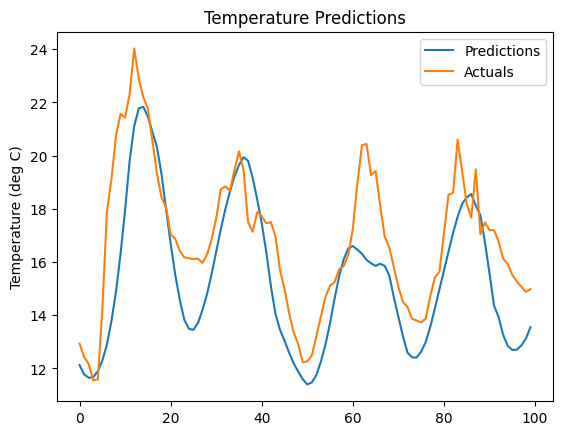

In [34]:
# evaluate and plot temperature
plot_temp_predictions(model_CNN, X_test, Y_test)

159/159 [==============================] - 0s 880us/step


,Pressure Predictions,Pressure Actuals
0,981.221436,982.43
1,981.435425,982.68
2,981.663513,983.02
3,981.860596,983.59
4,982.142334,983.59
...,...,...
95,984.519287,985.54
96,984.643799,985.68
97,984.794739,985.68
98,984.845337,985.67


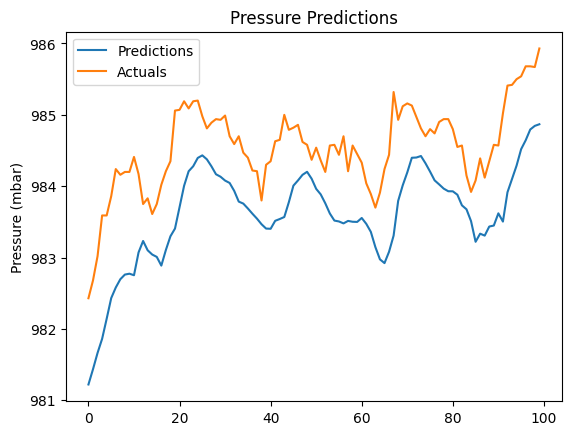

In [35]:
# evaluate and plot pressure
plot_pre_predictions(model_CNN, X_test, Y_test)

### GRU Model Evaluation

159/159 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals
0,973.526123,12.93
1,973.526123,12.43
2,973.526123,12.17
3,973.526123,11.55
4,973.526123,11.59
...,...,...
95,973.526123,15.52
96,973.526123,15.27
97,973.526123,15.07
98,973.526123,14.88


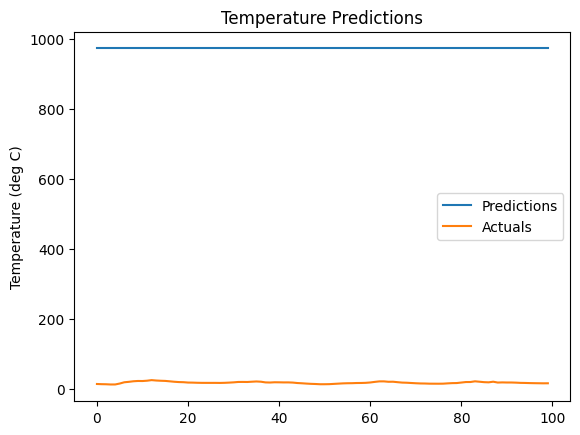

In [36]:
# evaluate and plot temperature
plot_temp_predictions(model_GRU, X_test, Y_test)

159/159 [==============================] - 0s 2ms/step


,Pressure Predictions,Pressure Actuals
0,988.977417,982.43
1,988.977417,982.68
2,988.977417,983.02
3,988.977417,983.59
4,988.977417,983.59
...,...,...
95,988.977417,985.54
96,988.977417,985.68
97,988.977417,985.68
98,988.977417,985.67


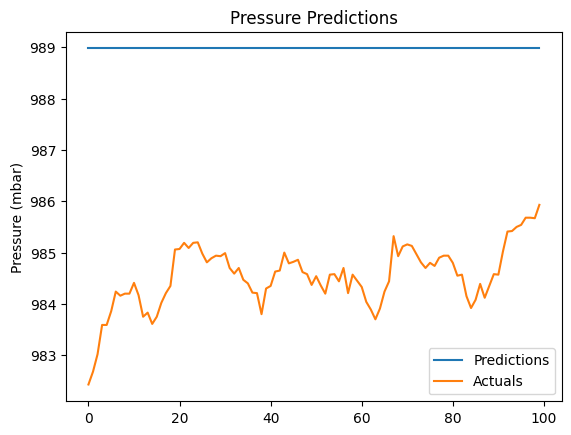

In [37]:
# evaluate and plot pressure
plot_pre_predictions(model_GRU, X_test, Y_test)